### 02_Data_Job_Types
In the previous analysis, I expand the search from `Data Scientist` to include `Data Analyst` and `Data Engineer`. 

I'm still missing some other titles like `Research Scientist`, `Applied Scientist`, `Applied Research Scientist` etc. How do I scrap data in a way that truly include all the related job families in Data Science industry?

With some initial explorations, I decided to divide the data science job families into 4 types.

#### 4 Types of DS Jobs
- Type I: Machine Learning (ML) - Research Scientist, Applied Scientist, Machine Learning Engineer
- Type II: Data Science (DS) - Data Scientist
- Type III: Data Analyst (DA) - Data Analyst
- Type IV: Data Engineering (DE) - Data Engineer 

Note: something I noticed from previous analysis, 6K data were lost from last time scrapping (2 weeks ago?) and most of them are DA. 

In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import pickle
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import lxml

### Type I: Machine Learning
Research Scientist, Applied Scientist, Machine Learning Engineer

The title `Research Scientist` introduces a lot of noices from research insititutions that mean something outside of the data science industry. One way to filter them out is by company list.

In this section I'll take RS out initially and put it back to ML category after cleanning.

In [85]:
# link to the scrap 
# Research+Scientist, Applied+Scientist, Machine+Learning

links = [
#     'https://h1bdata.info/index.php?em=&job=Research+Scientist&city=&year=All+Years',
#     'https://h1bdata.info/index.php?em=&job=Research+Scientist+&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Applied+Scientist&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Applied+Scientist+&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Machine+Learning+&city=&year=All+Years',
]

jobs_list_ML = []
for link in links:
    page_link = link
    page_response = requests.get(page_link, timeout=1000)
    page_content = BeautifulSoup(page_response.content, 'lxml')

    for row in page_content.find_all('tr')[1:]:
        row_data = []
        for i in row:
            row_data.append(i.text)
        jobs_list_ML.append(row_data)

len(jobs_list_ML)

1755

In [86]:
# Put everything into dataframes for easier processing

ML_df = pd.DataFrame()
ML_df['type'] = ['ML' for i in jobs_list_ML]
ML_df['company'] = [i[0] for i in jobs_list_ML]
ML_df['title'] = [i[1] for i in jobs_list_ML]
ML_df['salary'] = [i[2].replace(',','') for i in jobs_list_ML]
ML_df['salary'] = ML_df['salary'].astype(float)
ML_df['location'] = [i[3] for i in jobs_list_ML]
ML_df['date'] = [i[4] for i in jobs_list_ML]
ML_df['date'] = pd.to_datetime(ML_df['date'])
ML_df['year'] = [i.year for i in ML_df['date']]

In [87]:
ML_df[['title','type']].groupby(['title']).count().sort_values(by=["type"], ascending=False).head(10)

,type
title,
MACHINE LEARNING ENGINEER,555
APPLIED SCIENTIST II,287
APPLIED SCIENTIST,210
APPLIED SCIENTIST I,190
MACHINE LEARNING SCIENTIST,74
APPLIED SCIENTIST III,51
MACHINE LEARNING SOFTWARE ENGINEER,36
MACHINE LEARNING DEVELOPER,25
MACHINE LEARNING RESEARCH ENGINEER,25


In [92]:
ML_df.shape

(1755, 7)


### Type II: Data Science


In [30]:
links = [
    'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Senior+Data+Scientist&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Scientist+&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Science+&city=&year=All+Years',
]

jobs_list_DS = []
for link in links:
    page_link = link
    page_response = requests.get(page_link, timeout=1000)
    page_content = BeautifulSoup(page_response.content, 'lxml')

    for row in page_content.find_all('tr')[1:]:
        row_data = []
        for i in row:
            row_data.append(i.text)
        jobs_list_DS.append(row_data)

len(jobs_list_DS)

10642

In [33]:
# Put everything into dataframes for easier processing

DS_df = pd.DataFrame()
DS_df['type'] = ['DS' for i in jobs_list_DS]
DS_df['company'] = [i[0] for i in jobs_list_DS]
DS_df['title'] = [i[1] for i in jobs_list_DS]
DS_df['salary'] = [i[2].replace(',','') for i in jobs_list_DS]
DS_df['salary'] = DS_df['salary'].astype(float)
DS_df['location'] = [i[3] for i in jobs_list_DS]
DS_df['date'] = [i[4] for i in jobs_list_DS]
DS_df['date'] = pd.to_datetime(DS_df['date'])
DS_df['year'] = [i.year for i in DS_df['date']]

In [34]:
DS_df[['title','type']].groupby(['title']).count().sort_values(by=["type"], ascending=False).head(10)

,type
title,
DATA SCIENTIST,7344
SENIOR DATA SCIENTIST,1275
DATA SCIENTIST II,284
DATA SCIENTIST I,211
DATA SCIENCE ENGINEER,146
DATA SCIENCE ANALYST,135
DATA SCIENCE MANAGER,97
DATA SCIENTIST 2,92
DATA SCIENCE CONSULTANT,82


In [35]:
DS_df.shape

(10642, 7)


### Type III: Data Analyst


In [114]:
links = [
    'https://h1bdata.info/index.php?em=&job=Data+Analyst&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Analyst+&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Senior+Data+Analyst&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Analytics+&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Analysis+&city=&year=All+Years',
]

jobs_list_DA = []
for link in links:
    page_link = link
    page_response = requests.get(page_link, timeout=1000)
    page_content = BeautifulSoup(page_response.content, 'lxml')

    for row in page_content.find_all('tr')[1:]:
        row_data = []
        for i in row:
            row_data.append(i.text)
        jobs_list_DA.append(row_data)

len(jobs_list_DA)

10734

In [115]:
# Put everything into dataframes for easier processing

DA_df = pd.DataFrame()
DA_df['type'] = ['DA' for i in jobs_list_DA]
DA_df['company'] = [i[0] for i in jobs_list_DA]
DA_df['title'] = [i[1] for i in jobs_list_DA]
DA_df['salary'] = [i[2].replace(',','') for i in jobs_list_DA]
DA_df['salary'] = DA_df['salary'].astype(float)
DA_df['location'] = [i[3] for i in jobs_list_DA]
DA_df['date'] = [i[4] for i in jobs_list_DA]
DA_df['date'] = pd.to_datetime(DA_df['date'])
DA_df['year'] = [i.year for i in DA_df['date']]

In [116]:
DA_df[['title','type']].groupby(['title']).count().sort_values(by=["type"], ascending=False).head(10)

,type
title,
DATA ANALYST,6613
SENIOR DATA ANALYST,1311
DATA ANALYST 2,841
DATA ANALYST 3,317
DATA ANALYST II,158
DATA ANALYTICS ENGINEER,85
DATA ANALYST 4,81
DATA ANALYST III,68
DATA ANALYSIS MANAGER,62


In [31]:
DA_df.shape

(10610, 7)


### Type IV: Data Engineer


In [26]:
links = [
    'https://h1bdata.info/index.php?em=&job=Data+Engineer&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Senior+Data+Engineer&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Engineer+&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Engineering+&city=&year=All+Years',
]

jobs_list_DE = []
for link in links:
    page_link = link
    page_response = requests.get(page_link, timeout=1000)
    page_content = BeautifulSoup(page_response.content, 'lxml')

    for row in page_content.find_all('tr')[1:]:
        row_data = []
        for i in row:
            row_data.append(i.text)
        jobs_list_DE.append(row_data)

len(jobs_list_DE)

5079

In [15]:
# Put everything into dataframes for easier processing

DE_df = pd.DataFrame()
DE_df['type'] = ['DE' for i in jobs_list_DE]
DE_df['company'] = [i[0] for i in jobs_list_DE]
DE_df['title'] = [i[1] for i in jobs_list_DE]
DE_df['salary'] = [i[2].replace(',','') for i in jobs_list_DE]
DE_df['salary'] = DE_df['salary'].astype(float)
DE_df['location'] = [i[3] for i in jobs_list_DE]
DE_df['date'] = [i[4] for i in jobs_list_DE]
DE_df['date'] = pd.to_datetime(DE_df['date'])
DE_df['year'] = [i.year for i in DE_df['date']]

In [25]:
DE_df[['title','type']].groupby(['title']).count().sort_values(by=["type"], ascending=False).head(10)

,type
title,
DATA ENGINEER,2921
SENIOR DATA ENGINEER,902
DATA ENGINEER II,589
DATA ENGINEER I,171
DATA ENGINEER III,120
DATA ENGINEERING MANAGER,63
DATA ENGINEER ANALYST,30
DATA ENGINEER 2,20
DATA ENGINEER 3,18


### Filter_Research_Scientist

Build a list of companies that normally hire DS to be used as a filter for RS.

In [98]:
# create a set to store the list of companies 

company_set = set(i for i in DE_df.company)
company_set.add(i for i in DA_df.company)
company_set.add(i for i in DS_df.company)
company_set.add(i for i in ML_df.company)

company_df = pd.DataFrame(data=company_set, columns=['company'])
company_df.shape

(1464, 1)

In [95]:
# link to the scrap 
# Research+Scientist, Applied+Scientist, Machine+Learning

links = [
    'https://h1bdata.info/index.php?em=&job=Research+Scientist&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Research+Scientist+&city=&year=All+Years',
]

jobs_list_RS = []
for link in links:
    page_link = link
    page_response = requests.get(page_link, timeout=1000)
    page_content = BeautifulSoup(page_response.content, 'lxml')

    for row in page_content.find_all('tr')[1:]:
        row_data = []
        for i in row:
            row_data.append(i.text)
        jobs_list_RS.append(row_data)

len(jobs_list_RS)

5928

In [96]:
# Put everything into dataframes for easier processing

RS_df = pd.DataFrame()
RS_df['type'] = ['ML' for i in jobs_list_RS]
RS_df['company'] = [i[0] for i in jobs_list_RS]
RS_df['title'] = [i[1] for i in jobs_list_RS]
RS_df['salary'] = [i[2].replace(',','') for i in jobs_list_RS]
RS_df['salary'] = RS_df['salary'].astype(float)
RS_df['location'] = [i[3] for i in jobs_list_RS]
RS_df['date'] = [i[4] for i in jobs_list_RS]
RS_df['date'] = pd.to_datetime(RS_df['date'])
RS_df['year'] = [i.year for i in RS_df['date']]

In [97]:
# unfiltered_result:
RS_df[['title','type']].groupby(['title']).count().sort_values(by=["type"], ascending=False).head(10)

,type
title,
RESEARCH SCIENTIST,4541
RESEARCH SCIENTIST I,401
RESEARCH SCIENTIST II,367
RESEARCH SCIENTIST III,68
RESEARCH SCIENTIST 2,37
RESEARCH SCIENTIST 1,33
RESEARCH SCIENTIST ENGINEER,21
RESEARCH SCIENTIST INSTRUCTOR,20
RESEARCH SCIENTIST 3,12


In [91]:
company_df = pd.DataFrame(data=company_set, columns=['company'])
company_df.shape

(1464, 1)

In [99]:
# filter out some research scienctist title in ML_df
RS_df = RS_df.merge(company_df, how='inner')
RS_df[['title','type']].groupby(['title']).count().sort_values(by=["type"], ascending=False).head(10)

,type
title,
RESEARCH SCIENTIST,648
RESEARCH SCIENTIST II,201
RESEARCH SCIENTIST I,107
RESEARCH SCIENTIST III,33
RESEARCH SCIENTIST 2,26
RESEARCH SCIENTIST 1,19
RESEARCH SCIENTIST MANAGER,10
"RESEARCH SCIENTIST I, BIOLOGY",8
"RESEARCH SCIENTIST I, PROCESS DEVELOPMENT",8


With above filtering, RS_df went from 6k to 1k.

### Combine 4 Types
Combine all the df for analysis

In [105]:
Data_Jobs = [ML_df,DS_df,DA_df,DE_df,RS_df]
Data_Jobs_df = pd.concat(Data_Jobs)
Data_Jobs_df

,type,company,title,salary,location,date,year
0,ML,HOLOCHIP CORPORATION,APPLIED SCIENTIST,80000.0,"TORRANCE, CA",2018-03-19,2018
1,ML,BAYSPEC INC,APPLIED SCIENTIST,85467.0,"SAN JOSE, CA",2015-04-23,2015
2,ML,MICROSOFT CORPORATION,APPLIED SCIENTIST,105000.0,"BELLEVUE, WA",2015-03-16,2015
3,ML,PARADROMICS INC,APPLIED SCIENTIST,105581.0,"SAN JOSE, CA",2016-03-01,2016
4,ML,ZILLOW INC,APPLIED SCIENTIST,106000.0,"SEATTLE, WA",2019-02-20,2019
...,...,...,...,...,...,...,...
1116,ML,AMAZON ROBOTICS LLC,RESEARCH SCIENTIST II,120300.0,"NORTH READING, MA",2018-01-23,2018
1117,ML,AMAZON ROBOTICS LLC,RESEARCH SCIENTIST III,144000.0,"NORTH READING, MA",2017-04-27,2017
1118,ML,AMAZON SERVICES LLC,RESEARCH SCIENTIST II,134100.0,"SEATTLE, WA",2018-09-28,2018
1119,ML,AMAZON SERVICES LLC,RESEARCH SCIENTIST II,160000.0,"SUNNYVALE, CA",2018-10-08,2018


In [107]:
# Detect high-end outliners
Data_Jobs_df.sort_values(by=["salary"], ascending=False).head(10)

,type,company,title,salary,location,date,year
7343,DS,AIRBNB INC,DATA SCIENTIST,1350001.0,"SAN FRANCISCO, CA",2015-02-12,2015
7923,DA,ODS TECHNOLOGIES LP,SENIOR DATA ANALYST,900000.0,"LOS ANGELES, CA",2015-08-14,2015
6612,DA,ANTRA INC,DATA ANALYST,847000.0,"WASHINGTON, DC",2019-05-07,2019
171,DS,LARSON LIVING LABS LLC,DATA SCIENTIST,312000.0,"CAMBRIDGE, MA",2018-05-14,2018
170,DS,LARSON LIVING LABS LLC,DATA SCIENTIST,312000.0,"CAMBRIDGE, MA",2018-03-21,2018
8618,DS,APPLE INC,SENIOR DATA SCIENTIST,285000.0,"CUPERTINO, CA",2019-08-19,2019
996,ML,SPOTIFY USA INC,RESEARCH SCIENTIST,280000.0,"NEW YORK, NY",2019-03-04,2019
997,ML,SPOTIFY USA INC,RESEARCH SCIENTIST,280000.0,"NEW YORK, NY",2018-03-17,2018
766,ML,FACEBOOK INC,MACHINE LEARNING ACCELERATOR IMPLEMENTATION TE...,270000.0,"MENLO PARK, CA",2019-03-22,2019
2920,DE,PRO US-CW,DATA ENGINEER,265200.0,"MENLO PARK, CA",2019-08-07,2019


In [108]:
# Detect low-end outliners
Data_Jobs_df.sort_values(by=["salary"], ascending=True).head(10)

,type,company,title,salary,location,date,year
172,DS,THREATMETRIX INC,DATA SCIENTIST,5769.0,"SAN JOSE, CA",2015-01-06,2015
173,DS,DOMINION ENTERPRISES,DATA SCIENTIST,29973.0,"NORFOLK, VA",2016-03-01,2016
0,DA,NYC METRO REGIONAL CENTER LLC,DATA ANALYST,33380.0,"FLUSHING, NY",2016-03-24,2016
580,DA,INSTITUTE FOR TRUTH IN ACCOUNTING,DATA ANALYST,34050.0,"CHICAGO, IL",2017-03-22,2017
581,DA,INSTITUTE FOR TRUTH IN ACCOUNTING,DATA ANALYST,34050.0,"CHICAGO, IL",2017-03-22,2017
582,DA,INSTITUTE FOR TRUTH IN ACCOUNTING,DATA ANALYST,34050.0,"CHICAGO, IL",2017-03-22,2017
583,DA,INSTITUTE FOR TRUTH IN ACCOUNTING,DATA ANALYST,34050.0,"CHICAGO, IL",2017-03-22,2017
579,DA,INSTITUTE FOR TRUTH IN ACCOUNTING,DATA ANALYST,34050.0,"CHICAGO, IL",2017-03-22,2017
9367,DA,CLARUS SOLUTIONS LLC,DATA ANALYST AND REPORTING CONSULTANT,35006.0,"COLUMBUS, OH",2018-05-24,2018
585,DA,KIM CHEN AGENCY INC,DATA ANALYST,35500.0,"FRESH MEADOWS, NY",2016-03-22,2016


In [109]:
# data_by_year
Data_Jobs_df[["year","title"]].groupby(["year"]).count()

,title
year,
2012,4
2013,13
2014,327
2015,2503
2016,4427
2017,5164
2018,7672
2019,9097


In [111]:
# Outliners filter

# Drop pre 2014 data (very few observations pre 2014)
Data_Jobs_df.drop(Data_Jobs_df[Data_Jobs_df['year']<=2014].index, axis=0, inplace=True)

# Drop salaries over $400,000
Data_Jobs_df.drop(Data_Jobs_df[Data_Jobs_df['salary']>400000].index, axis=0, inplace=True)

# Drop salaries lower than $200,000
Data_Jobs_df.drop(Data_Jobs_df[Data_Jobs_df['salary']<20000].index, axis=0, inplace=True)

# Sort by company and year
Data_Jobs_df.sort_values(by=['year','company'], inplace=True, ascending=True)

Data_Jobs_df.shape

(28124, 7)

In [126]:
# aggregation_stats
Data_Jobs_df[["type","title"]].groupby(["type"]).count().sort_values(by=["title"], ascending=False)

,title
type,
DS,10295
DA,10263
DE,4865
ML,2701


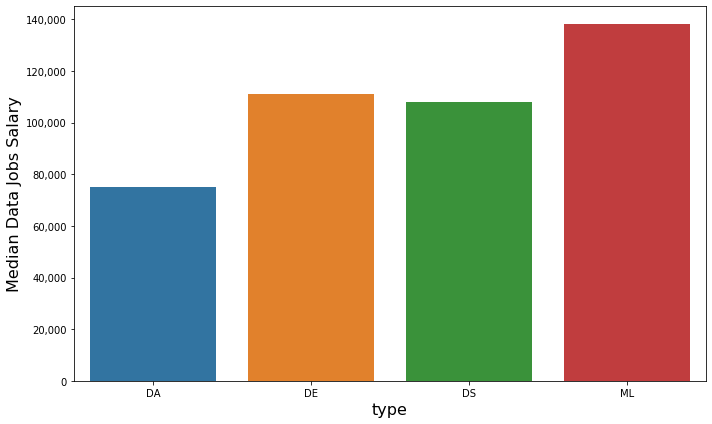

In [128]:
# median salary
median_salary = Data_Jobs_df.groupby(by=['type']).median().reset_index()

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=median_salary['type'], 
                 y=median_salary['salary'])
ax.set_xlabel("type",fontsize=16)
ax.set_ylabel("Median Data Jobs Salary",fontsize=16)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.savefig(fname='median_salary', dpi=150)

In [131]:
median_salary = Data_Jobs_df.groupby(by=['type']).median().reset_index()
median_salary[['type','salary']].sort_values(['salary'], ascending=False)

,type,salary
3,ML,138091.0
1,DE,111030.0
2,DS,108000.0
0,DA,75000.0


With the ambiguous data loss, we can reach the same conclusion as last time, but with cleaner analysis which shows stronger result.